# Konlpy 설치

In [146]:
import re
from konlpy.tag import Kkma
from konlpy.tag import Okt
import pandas as pd
from pykospacing import Spacing
import numpy as np
from tqdm.auto import tqdm
import os
import json
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc 
from sklearn.manifold import TSNE
%matplotlib inline

kkma = Kkma()
okt = Okt()

In [147]:
os.getcwd()

'C:\\Users\\w0w12\\Desktop\\프로젝트기반_빅데이터분석_서비스솔루션_개발과정\\3355_청소기_리뷰_찐최종\\Vacuum-cleaner_Natural-language'

# 전처리
크롤링한 데이터를 csv로 저장. 저장한 데이터를 가져와서 딕녀너리 형태로 변환 작업

## 김찬희

In [148]:
dyson_data= pd.read_csv('./data/다이슨.csv',encoding = 'cp949')

In [149]:
dyson_list = []
dyson_dict = {}
dyson_star = dyson_data['평점'].values
dyson_model_name = dyson_data.drop_duplicates(['제품명'])['제품명']
dyson_model_cost = dyson_data.drop_duplicates(['가격'])['가격']
dyson_review_list = []


#해당 제조사의 제품숫자로 변경 
for i in range(5):
    
    dyson_dict = {}
    dyson_name = dyson_model_name.iloc[i]
    dyson_cost = dyson_model_cost.iloc[i]
    
    dyson_test_1 = dyson_data['제품명'] == dyson_name
    dyson_test = dyson_data[dyson_test_1]
    dyson_star = dyson_test['평점'].tolist()[:100]
    dyson_channel = dyson_test['채널'].tolist()[:100]
    dyson_date = dyson_test['날짜'].tolist()[:100]
    dyson_review = dyson_test['리뷰'].tolist()[:100]
    dyson_review_list = dyson_test['리뷰'].tolist()[:100]
    
    dyson_dict['제품명'] = dyson_name
    dyson_dict['가격'] = dyson_cost
    dyson_dict['평점'] = dyson_star
    dyson_dict['채널'] = dyson_channel
    dyson_dict['날짜'] = dyson_date
    dyson_dict['리뷰'] = dyson_review
    
    dyson_list.append(dyson_dict)
    


In [150]:
dibea_data = pd.read_csv('./data/디베아.csv',encoding = 'cp949')

In [151]:
dibea_list = []
dibea_dict = {}
dibea_star = dibea_data['평점'].values
dibea_model_name = dibea_data.drop_duplicates(['제품명'])['제품명']
dibea_model_cost = dibea_data.drop_duplicates(['가격'])['가격']
dibea_review_list = []


#해당 제조사의 제품숫자로 변경 
for i in range(5):
    
    dibea_dict = {}
    dibea_name = dibea_model_name.iloc[i]
    dibea_cost = dibea_model_cost.iloc[i]
    
    dibea_test_1 = dibea_data['제품명'] == dibea_name
    dibea_test = dibea_data[dibea_test_1]
    dibea_star = dibea_test['평점'].tolist()[:100]
    dibea_channel = dibea_test['채널'].tolist()[:100]
    dibea_date = dibea_test['날짜'].tolist()[:100]
    dibea_review = dibea_test['리뷰'].tolist()[:100]
    dibea_review_list = dibea_test['리뷰'].tolist()[:100]
    
    dibea_dict['제품명'] = dibea_name
    dibea_dict['가격'] = dibea_cost
    dibea_dict['평점'] = dibea_star
    dibea_dict['채널'] = dibea_channel
    dibea_dict['날짜'] = dibea_date
    dibea_dict['리뷰'] = dibea_review
    
    dibea_list.append(dibea_dict)



## 박유정

- 엘지

In [152]:
# 데이터 읽어오기
lg_data = pd.read_csv('./data/엘지_중복제거.csv',  encoding = 'cp949')
lg_data.head()

,가격,평점,채널,날짜,제품명,리뷰
0,"775,970",평점5,보다쇼핑,21.11.01.,LG전자 코드제로 A9S 올인원타워 AS9370IKT,주문하고 3~4주 걸릴수있다고 안내전화받고 기다렸는데 10일만에 배송된다고 lg기사...
1,"775,970",평점3,신세계TV쇼핑,21.11.05.,LG전자 코드제로 A9S 올인원타워 AS9370IKT,일단 배송이 한달 걸렸어요.. 삼성비스코프 청소기에 결함이 있어서 반품 처리 하고 ...
2,"775,970",평점4,쇼핑엔티,21.11.16.,LG전자 코드제로 A9S 올인원타워 AS9370IKT,생각했던것보다 배송은 빨랐네요(10일 걸렸습니다)유선 청소기만 쓰다가 무선청소기 처...
3,"775,970",평점3,CJ온스타일,21.09.15.,LG전자 코드제로 A9S 올인원타워 AS9370IKT,"청소는 주로 남편이 하니까, 제가 청소기 쓸 일은 거의 없긴 한데요, 이것을 주로 ..."
4,"775,970",평점4,신세계TV쇼핑,21.09.20.,LG전자 코드제로 A9S 올인원타워 AS9370IKT,우선 먼지통 비우는 불편함이 없는점이 제일 좋았어요~소음도 생각보다 크지않고 청소기...


In [153]:
# 결측치 확인
print(lg_data.isnull().sum())

가격     0
평점     0
채널     0
날짜     0
제품명    0
리뷰     0
dtype: int64


In [154]:
lg_model_name = lg_data.drop_duplicates(['제품명'])['제품명'] 
lg_model_cost = lg_data.drop_duplicates(['가격'])['가격']    

In [155]:
lg_model_name 

0      LG전자 코드제로 A9S 올인원타워 AS9370IKT
180               LG전자 오브제컬렉션 AO9571
362              LG전자 코드제로 A9S A9370
542        LG전자 A9S 오브제컬렉션 AO9471WKT
703                 LG전자 코드제로 A9100S
882              LG전자 코드제로 A9S A9700
Name: 제품명, dtype: object

In [156]:
lg_model_cost

0        775,970
180    1,070,100
362      698,220
542    1,059,000
703      593,170
882      867,260
Name: 가격, dtype: object

In [157]:
# lg 6개 제품
lg_list = []
lg_review_list = []
for i in range(6):
    
    lg_dict = {}
    lg_name = lg_model_name.iloc[i]
    lg_cost = lg_model_cost.iloc[i]
    
    lg_test_1 = lg_data['제품명'] == lg_name
    lg_test = lg_data[lg_test_1]
    lg_star = lg_test['평점'].tolist()[:100]
    lg_channel = lg_test['채널'].tolist()[:100]
    lg_date = lg_test['날짜'].tolist()[:100]
    lg_review = lg_test['리뷰'].tolist()[:100]
    lg_review_list = lg_test['리뷰'].tolist()[:100]
    
    lg_dict['제품명'] = lg_name
    lg_dict['가격'] = lg_cost
    lg_dict['평점'] = lg_star
    lg_dict['채널'] = lg_channel
    lg_dict['날짜'] = lg_date
    lg_dict['리뷰'] = lg_review
    
    lg_list.append(lg_dict)


In [158]:
print(len(lg_list))

6


In [159]:
print(lg_list[0].keys())

dict_keys(['제품명', '가격', '평점', '채널', '날짜', '리뷰'])


- 테팔

In [160]:
tefal_data = pd.read_csv('./data/테팔_중복제거.csv',  encoding = 'cp949')
tefal_data.head()

,가격,평점,채널,날짜,제품명,리뷰
0,"178,600",평점4,11번가,21.10.13.,2020년형테팔 엑스퍼트3.60 TY6933,"무선청소기 넘 갖고 싶었는데 가격 부담없는 테팔로 구매했어요. 사용 후 장,단점을 ..."
1,"178,600",평점3,11번가,21.11.11.,2020년형테팔 엑스퍼트3.60 TY6933,장점: 저렴하게 샀다. 카드 할인까지 받아서 94050에 샀다. 가볍다. 기능이 단...
2,"178,600",평점3,테팔,21.09.10.,2020년형테팔 엑스퍼트3.60 TY6933,"장점-가격이 저렴, 배터리 잔량표시됨, 무게가 가볍다.단점-공기청정기나 선풍기인줄...."
3,"178,600",평점5,11번가,21.10.06.,2020년형테팔 엑스퍼트3.60 TY6933,배송은 일단 빨랐습니다. 포장상태도 만족하구요.벽에 고정시켜서 청소기를 거치도 할 ...
4,"178,600",평점5,11번가,21.04.07.,2020년형테팔 엑스퍼트3.60 TY6933,6년동안 사용했던 삼성 무선청소기가 갑자기 고장이 나서 급하게 찾아보다가 저렴한 가...


In [161]:
# 결측치 확인
print(tefal_data.isnull().sum())

가격     0
평점     0
채널     0
날짜     0
제품명    0
리뷰     0
dtype: int64


In [162]:
tefal_list = [] 
tefal_review_list = []
tefal_model_name = tefal_data.drop_duplicates(['제품명'])['제품명']
tefal_model_cost = tefal_data.drop_duplicates(['가격'])['가격']

# tefal 4개
for i in range(4):
    
    tefal_dict = {}
    tefal_name = tefal_model_name.iloc[i]
    tefal_cost = tefal_model_cost.iloc[i]
    
    tefal_test_1 = tefal_data['제품명'] == tefal_name
    tefal_test = tefal_data[tefal_test_1]
    tefal_star = tefal_test['평점'].tolist()[:100]
    tefal_channel = tefal_test['채널'].tolist()[:100]
    tefal_date = tefal_test['날짜'].tolist()[:100]
    tefal_review = tefal_test['리뷰'].tolist()[:100]
    tefal_review_list = tefal_test['리뷰'].tolist()[:100]
    
    tefal_dict['제품명'] = tefal_name
    tefal_dict['가격'] = tefal_cost
    tefal_dict['평점'] = tefal_star
    tefal_dict['채널'] = tefal_channel
    tefal_dict['날짜'] = tefal_date
    tefal_dict['리뷰'] = tefal_review
    
    tefal_list.append(tefal_dict)



In [163]:
print(len(tefal_list))

4


## 정새하

In [164]:
samsung_df = pd.read_csv('./data/삼성.csv', encoding='cp949')
samsung_df.head()

,가격,평점,채널,날짜,제품명,리뷰
0,"598,740",평점5,삼성공식파트너 평강프라자,21.04.29.,삼성전자 비스포크제트 VS20A956A3,삼성의 역전1. 구입동기경쟁사 제품을 약 3년간 사용하면서 3번의 배터리 방전 문제...
1,"598,740",평점5,삼성공식파트너 평강프라자,21.05.30.,삼성전자 비스포크제트 VS20A956A3,기존에 타사A 제품 처음 출시될때부터 사용했어요~유선 청소기는 이제 더이상 사용...
2,"598,740",평점5,신세계몰,21.11.24.,삼성전자 비스포크제트 VS20A956A3,저가 청소기를 3~4년정도 쓰다가 흡입력도 떨어지고 충전도 잘 안되서 큰마음먹고 청...
3,"598,740",평점5,11번가,21.11.27.,삼성전자 비스포크제트 VS20A956A3,다이슨청소기만 오래사용하다가 삼성 제트로 바꿨어요.다이슨은 소음도 크고 사용시 버튼...
4,"598,740",평점5,신세계몰,21.12.02.,삼성전자 비스포크제트 VS20A956A3,집에서 유선청소기를 쓰려면 전기코드 찾아야 되고 또 전기선이 짧아 고생하다가 삼성비...


In [165]:
sinil_df = pd.read_csv('./data/신일.csv', encoding='cp949')
sinil_df

,가격,평점,채널,날짜,제품명,리뷰
0,"32,710",평점1,아비소,21.10.11.,신일 싹쓸이 SVC-680G,참...사람 욕심이란게....첨엔 그래 머리카락만 잘 빨아들이몀 된다 생각했는데.....
1,"32,710",평점4,G마켓,21.08.02.,신일 싹쓸이 SVC-680G,아이들이 지우개 찌꺼기 진공청소기를 산다기에 알아봤더니책상용 진공청소기도 성능이 쓸...
2,"32,710",평점4,아비소,21.07.30.,신일 싹쓸이 SVC-680G,머리카락용으로 구입했어요머리말릴때 머리카락이 너무 많이 빠져서휴지뽑아 손으로 쓱쓱 ...
3,"32,710",평점5,옥션,21.08.10.,신일 싹쓸이 SVC-680G,배송은 빠른편이구요 상품도 마음에 들어요 가격이 왔다갔다 하네요 다행히 쫌 더 저렴...
4,"32,710",평점5,아비소,21.01.02.,신일 싹쓸이 SVC-680G,전에도 신일 싹쓰리 5년정도 써서 이번에도 신일꺼로 구매했어요.그때보다 힘도 쎄지고...
...,...,...,...,...,...,...
916,"38,700",평점5,SK스토아,20.10.19.,신일전자 SVC-SHS500,딸아이 기숙사 보냈어요.공간도 많이 차지하고 않고 좋다고 하네요
917,"38,700",평점5,G마켓,20.11.07.,신일전자 SVC-SHS500,잘 받았습니다 감사합니다
918,"38,700",평점5,위메프,20.10.23.,신일전자 SVC-SHS500,엄마 사드렸어요. 간단하게 청소하기 좋네요
919,"38,700",평점5,전자랜드,20.10.23.,신일전자 SVC-SHS500,흡 입 력 좋아요.


In [166]:
#null 값 확인
print(samsung_df.isnull().sum())
print(sinil_df.isnull().sum())

가격     0
평점     0
채널     2
날짜     0
제품명    0
리뷰     0
dtype: int64
가격     0
평점     0
채널     0
날짜     0
제품명    0
리뷰     0
dtype: int64


In [167]:
samsung_df[samsung_df['채널'].isnull()]

,가격,평점,채널,날짜,제품명,리뷰
389,"59,030",평점5,NaN,20.11.29.,삼성전자 삼성 VC-H71,한국산이라서 품질이 좋다.중국산 5만원짜리 사서 썼는데 빨리 고장나서 전에 쓰던...
411,"59,030",평점5,NaN,19.06.05.,삼성전자 삼성 VC-H71,제가 쓰던 청소기인데 너무 괜찮아서 엄마 사드렸어요. 가볍고 바닥에 떨어진 부스러기...


In [168]:
#결측치 대체 위한 채널 수 확인
samsung_df['채널'].value_counts() 

컴퓨존              154
11번가             141
신세계몰             122
삼성공식파트너 보보       118
SSG닷컴             88
G마켓               57
하이마트쇼핑몰           42
네고네고              36
롯데홈쇼핑             31
옥션                22
삼성공식파트너 평강프라자     15
현대Hmall           15
글로벌114            11
솔커머스              10
롯데ON               8
GSSHOP             8
코스트컷몰              7
인터파크               4
전자랜드               3
강남언니네              3
디자이너 W             3
위메프                3
삼성공식파트너 디지털마트      3
롯데백화점              3
보다쇼핑               1
동원몰                1
케이엔디지털             1
선                  1
Name: 채널, dtype: int64

In [169]:
#440, 462
samsung_df.iloc[440]['채널'] = '컴퓨존'
samsung_df.iloc[462]['채널'] = '컴퓨존'

In [170]:
print(samsung_df.isnull().sum())

가격     0
평점     0
채널     2
날짜     0
제품명    0
리뷰     0
dtype: int64


In [171]:
item_group = samsung_df.groupby('제품명').count()
item_group

,가격,평점,채널,날짜,리뷰
제품명,,,,,
삼성전자 비스포크제트 VS20A956A3,185,185,185,185,185
삼성전자 삼성 VC-H22,181,181,181,181,181
삼성전자 삼성 VC-H71,183,183,181,183,183
삼성전자 제트 VS15R8500BF,183,183,183,183,183
삼성전자 제트 VS20T9218QDCC,181,181,181,181,181


In [172]:
price_group = samsung_df.groupby('가격').count()
price_group

,평점,채널,날짜,제품명,리뷰
가격,,,,,
"398,780",183,183,183,183,183
"45,900",181,181,181,181,181
"568,450",181,181,181,181,181
"59,030",183,181,183,183,183
"598,740",185,185,185,185,185


In [173]:
samsung_keys = item_group.index
samsung_keys

Index(['삼성전자 비스포크제트 VS20A956A3', '삼성전자 삼성 VC-H22', '삼성전자 삼성 VC-H71',
       '삼성전자 제트 VS15R8500BF', '삼성전자 제트 VS20T9218QDCC'],
      dtype='object', name='제품명')

In [174]:
samsung_prices = price_group.index
samsung_prices[1]

'45,900'

In [175]:
#삼성 딕셔너리 
samsung_dic_list=[]
samsung_review_list = [] # 리뷰

for i, key in enumerate(samsung_keys):
    samsung_dic = {}
    samsung_dic['제품명'] = key
    samsung_dic['가격'] = samsung_prices[i]  
    #해당 제품의 데이터만 가져오기
    samsung_item_review_df = samsung_df[samsung_df['제품명'] == key]
    samsung_dic['리뷰'] = samsung_item_review_df['리뷰'].tolist()[:100]   
    samsung_dic['평점'] = samsung_item_review_df['평점'].tolist()[:100]
    samsung_dic['날짜'] = samsung_item_review_df['날짜'].tolist()[:100]
    samsung_dic['채널'] = samsung_item_review_df['채널'].tolist()[:100]    
    samsung_review_list = samsung_item_review_df['리뷰'].tolist()[:100]
   
    samsung_dic_list.append(samsung_dic)

  


In [176]:
item_group = sinil_df.groupby('제품명').count()
item_group
sinil_keys = item_group.index
sinil_keys

Index(['신일 싹쓸이 SVC-680G', '신일전자 SVC-1316R', '신일전자 SVC-8858PNX',
       '신일전자 SVC-P5000HP', '신일전자 SVC-SHS500'],
      dtype='object', name='제품명')

In [177]:
price_group = sinil_df.groupby('가격').count()
price_group
sinil_prices = price_group.index
sinil_prices[0]

'179,000'

In [178]:
#신일 딕셔너리

sinil_dic_list=[]
sinil_review_list = [] # 리뷰

for i, key in enumerate(sinil_keys):
    sinil_dic = {}
    sinil_dic['제품명'] = key
    sinil_dic['가격'] = sinil_prices[i]  
    #해당 제품의 데이터만 가져오기
    sinil_item_review_df = sinil_df[sinil_df['제품명'] == key]
    sinil_dic['리뷰'] = sinil_item_review_df['리뷰'].tolist()[:100]
    sinil_dic['평점'] = sinil_item_review_df['평점'].tolist()[:100]
    sinil_dic['날짜'] = sinil_item_review_df['날짜'].tolist()[:100]
    sinil_dic['채널'] = sinil_item_review_df['채널'].tolist()[:100]
    
    sinil_review_list =  sinil_item_review_df['리뷰'].tolist()[:100]
   
    sinil_dic_list.append(sinil_dic)


## 정한슬

In [179]:
import pandas as pd
cucu_df = pd.read_csv('./data/쿠쿠 홈시스.csv')
cucu_df.drop(columns=cucu_df.columns[0] ,axis=1, inplace=True)
cucu_df

,가격,평점,채널,날짜,제품명,리뷰
0,"309,000",평점5,쿠쿠홈시스생활가전,21.10.02.,쿠쿠홈시스 쿠쿠 CVC-A1410UG,청소기 잘 샀네요~~~~
1,"309,000",평점5,쿠쿠온라인공식판매점,20.09.17.,쿠쿠홈시스 쿠쿠 CVC-A1410UG,빠른배송 쵝오에요~
2,"309,000",평점5,쿠쿠넬로,21.03.02.,쿠쿠홈시스 쿠쿠 CVC-A1410UG,다이슨 보다 좋아요
3,"309,000",평점3,주식회사 원어나더,21.05.24.,쿠쿠홈시스 쿠쿠 CVC-A1410UG,가성비 좋은 청소기
4,"309,000",평점2,옥션,21.02.20.,쿠쿠홈시스 쿠쿠 CVC-A1410UG,"플라스틱 사출 상태가 좋지 않고, 충전기 잭 연결쪽이 조금 뛰어 나와서 품질에 좀신..."
...,...,...,...,...,...,...
355,"248,930",평점5,G마켓,21.07.25.,쿠쿠홈시스 쿠쿠 CVC-A1420UG,가성비 최강입니다. 배터리도 하나더 준다고 하니 대기업제품 안부럽네요. 흡입력 사용...
356,"248,930",평점3,쿠쿠홈시스 주식회사,21.01.02.,쿠쿠홈시스 쿠쿠 CVC-A1420UG,"26일에 주문했는데 31일에 받았고, 왠만하면 다 찾아보고 구매하세요. 본사에서 운..."
357,"248,930",평점5,신세계몰,21.10.01.,쿠쿠홈시스 쿠쿠 CVC-A1420UG,기존 유선청소기 사용하면서 무선청소기에 관심을 갖고 검색중에 쿠쿠에서도 무선청소기...
358,"248,930",평점5,SSG닷컴,20.09.22.,쿠쿠홈시스 쿠쿠 CVC-A1420UG,청소기 바꾸려고 고민하다가 가격이 적당해서 구입햇는데생각보다 너무 괜찮네요우선 제품...


In [180]:
cucuname=cucu_df['제품명'].unique()
cucuprice=cucu_df['가격'].unique()

cucu_list = []
cucu_review_list = []

for i, key in enumerate(cucuname):
    cucu_dic = {}
    cucu_dic['제품명'] = key
    cucu_dic['가격'] = cucuprice[i]

    cucu_item_df = cucu_df[cucu_df['제품명']==key]

    cucu_dic['리뷰'] = cucu_item_df['리뷰'].tolist()[:100]
    cucu_dic['채널'] = cucu_item_df['채널'].tolist()[:100]
    cucu_dic['평점'] = cucu_item_df['평점'].tolist()[:100]
    cucu_dic['날짜'] = cucu_item_df['날짜'].tolist()[:100]
    cucu_review_list = cucu_item_df['리뷰'].tolist()[:100]

    cucu_list.append(cucu_dic)


In [181]:
boman_df =pd.read_csv('./data/보만.csv')
boman_df.drop(columns=boman_df.columns[0],axis=1,inplace=True)
boman_df

,가격,평점,채널,날짜,제품명,리뷰
0,"36,890",평점5,보만코리아,20.05.30.,보만 VC7210,가격대비 성능 짱인것 같아요자취방에서 3개월정도 사용하려고 구입했어요그래서 너무고가...
1,"36,890",평점5,보만코리아,19.10.08.,보만 VC7210,일단 배송빨랐어요. 박스포장도 깔끔해요.원룸에 청소기가 필요해서 구입했어요. 싼거 ...
2,"36,890",평점4,11번가,19.11.04.,보만 VC7210,가격 디자인 모두 마음에 들어요..무게도 많이 무겁지 않고 사용법도 스위치만 켜면 ...
3,"36,890",평점5,바디퓨,20.06.25.,보만 VC7210,집에 30만원짜리 삼* 청소기를 쓰다가 본체가 잘 따라오지도않고 무겁고 문턱에서 쿠...
4,"36,890",평점4,보만코리아,21.03.11.,보만 VC7210,청소기 오자마자 써봤어요조그만게 핸디용으로 먼지 시원시원하게 잘빨리고 좋아요다이슨쓰...
...,...,...,...,...,...,...
655,"49,790",평점5,코맘스,21.12.09.,보만 코맘스 KB0251,작은사이즈에 이정도 힘이면 잘 만드셨네요~잘쓰겠습니다~^^
656,"49,790",평점5,코맘스,21.12.26.,보만 코맘스 KB0251,작아서 편리하고 디자이도 예뻐요~ 충전도 빨리되어 좋아요!
657,"49,790",평점4,코맘스,22.01.03.,보만 코맘스 KB0251,"이벤트해서 싸게 구매해서 만족해요.방에 머리카락이나 작은 먼지들 청소하기 좋구요, ..."
658,"49,790",평점5,코맘스,21.08.26.,보만 코맘스 KB0251,슬림해서 수납하기 좋고디자인도 예뻐서 넘 조아요흡입력도 좋고 다 괜찮고 한번 충전하...


In [182]:
bomanname=boman_df['제품명'].unique()
bomanprice=boman_df['가격'].unique()

boman_list = []
boman_review_list=[]

for i , key in enumerate(bomanname):
    boman_dic = {}
    boman_dic['제품명'] = key
    boman_dic['가격'] = bomanprice[i]

    boman_item_df = boman_df[boman_df['제품명']==key]

    boman_dic['리뷰'] = boman_item_df['리뷰'].tolist()[:100]
    boman_dic['채널'] = boman_item_df['채널'].tolist()[:100]
    boman_dic['평점'] = boman_item_df['평점'].tolist()[:100]
    boman_dic['날짜'] = boman_item_df['날짜'].tolist()[:100]
    boman_review_list = boman_item_df['리뷰'].tolist()[:100]

    boman_list.append(boman_dic)


In [183]:
vivre_df=pd.read_csv('./data/비브르.csv')
vivre_df.drop(columns= vivre_df.columns[0], axis=1, inplace=True)
vivre_df

,가격,평점,채널,날짜,제품명,리뷰
0,"107,160",평점3,VIVRE KOREA,19.11.15.,비브르 A9 PLUS,"댕댕이 털갈이 때문에 구입했어요.한 달 사용해본 결과, 흡입력이 약하고 사용시간이 ..."
1,"107,160",평점1,VIVRE KOREA,19.09.04.,비브르 A9 PLUS,정말 별 한나도 아까운 청소기에요 흡입력도 약하고 고양이 두부모래 다시 뺏어내고 2...
2,"107,160",평점5,VIVRE KOREA,19.08.28.,비브르 A9 PLUS,가성비 짱이네요.요즘 댕댕이 털 갈이 시작되어 고민하다 구입했구요.도착하자마자 돌려...
3,"107,160",평점5,VIVRE KOREA,20.03.22.,비브르 A9 PLUS,일단 빠른 배송에 감동했구요!! 좋지 않은 후기들도 있어서 긴가민가하면서 구매했는데...
4,"107,160",평점5,VIVRE KOREA,19.06.24.,비브르 A9 PLUS,가성비 대박이에요. 맘카페에서 좋다고 말이 많아서 검색하다 구입했는데..가볍고 필...
...,...,...,...,...,...,...
515,"173,000",평점5,VIVRE KOREA,20.03.27.,비브르 스톰파워 VE30,일단 배송이 빨랐어요~~ 터치부분이 led라 고급스러워 보이구 세기조절도 3단계라 ...
516,"173,000",평점5,VIVRE KOREA,20.12.17.,비브르 스톰파워 VE30,가성비 극강입니다!! 헤드도 다양하게 바꿀수 있고 1단일때는 밤에 돌려도 될 정도의...
517,"173,000",평점5,VIVRE KOREA,20.08.27.,비브르 스톰파워 VE30,비브르 무선청소기를 처음 보았을 때 흡입력에 관한 의문이 들었는데 리뷰를 보고 동영...
518,"173,000",평점4,VIVRE KOREA,20.09.07.,비브르 스톰파워 VE30,1. 배송 : 2일2. 제품 : 기존에 누르고 있는 버튼에 대비해서 터치식이라 편합...


In [184]:
vivrename=vivre_df['제품명'].unique()
vivreprice=vivre_df['가격'].unique()

vivre_list = []
vivre_review_list = []

for i , key in enumerate(vivrename):
    vivre_dic = {}
    vivre_dic['제품명'] = key
    vivre_dic['가격'] =vivreprice[i]

    vivre_item_df = vivre_df[vivre_df['제품명']==key]

    vivre_dic['리뷰']= vivre_item_df['리뷰'].tolist()[:100]
    vivre_dic['채널']= vivre_item_df['채널'].tolist()[:100]
    vivre_dic['평점']= vivre_item_df['평점'].tolist()[:100]
    vivre_dic['날짜']= vivre_item_df['날짜'].tolist()[:100]
    vivre_review_list = vivre_item_df['리뷰'].tolist()[:100]

    vivre_list.append(vivre_dic)

In [185]:
oa_df =pd.read_csv('./data/오아 클린스틱.csv')
oa_df.drop(columns = oa_df.columns[0],axis=1, inplace=True)
oa_df

,가격,평점,채널,날짜,제품명,리뷰
0,"69,000",평점4,오아스토어,20.07.07.,2020년형오아 클린스틱 OA-CL010,머리카락 같은거는 정말 잘되구요헌데 방하나 구석구석하고나니 모터가 엄청 뜨거워져서 ...
1,"69,000",평점5,오아스토어,21.02.27.,2020년형오아 클린스틱 OA-CL010,방을 꾸미면서 카페트를 깔았는데 강아지 털과 먼지가 계속 쌓여서 돌돌이로는 어림도 ...
2,"69,000",평점5,오아스토어,21.04.14.,2020년형오아 클린스틱 OA-CL010,흡입력짱입니다. 소음이 좀 있다는 후기가 있었는데 코드제로에 비교하면 비슷하거나 아...
3,"69,000",평점5,오아스토어,21.01.06.,2020년형오아 클린스틱 OA-CL010,이번에 이사를 오면서 청소기 구매에 대해서 엄청 고민을 많이 했드래요~큰거는 하나가...
4,"69,000",평점5,오아스토어,21.06.04.,2020년형오아 클린스틱 OA-CL010,매장에서 깊이 들어가있는 필터용 청소기로 사용하려고 주문 했었는데 너무 좋은거있죠 ...
...,...,...,...,...,...,...
155,"69,000",평점5,오아스토어,20.12.29.,2020년형오아 클린스틱 OA-CL010,작아서 보관하기 좋고 쪼그만게 생각보다 잘 빨아드리네요. 집에 로봇청소기가 있어서 ...
156,"69,000",평점5,오아스토어,21.09.12.,2020년형오아 클린스틱 OA-CL010,저렴한 가격에 아주 가벼운 청소기. 허리 숙이지 않아도 되어서 너무 편합니다. 가벼...
157,"69,000",평점1,오아스토어,21.07.24.,2020년형오아 클린스틱 OA-CL010,머리가 작고 너무 가벼워서 헤드가 자꾸 뜸. 그래서 청소가 잘 안됨. 눈에 띄는 머...
158,"69,000",평점5,오아스토어,21.08.13.,2020년형오아 클린스틱 OA-CL010,생각보다 크기가 엄청 큽니다ㅎㅎㅎ저는 차에 두고 쓰려고 했는데 크기만 보면 한 자리...


In [186]:
oaname=oa_df['제품명'].unique()
oaprice=oa_df['가격'].unique()

In [187]:
oa_list = []
oa_review_list = []
for i, key in enumerate(oaname):
    oa_dic = {}
    oa_dic['제품명'] = key
    oa_dic['가격'] = oaprice[i]

    oa_item_df = oa_df[oa_df['제품명']==key]

    oa_dic['리뷰'] = oa_item_df['리뷰'].tolist()[:100]
    oa_dic['채널'] = oa_item_df['채널'].tolist()[:100]
    oa_dic['평점'] = oa_item_df['평점'].tolist()[:100]
    oa_dic['날짜'] = oa_item_df['날짜'].tolist()[:100]
    oa_review_list = oa_item_df['리뷰'].tolist()[:100]

    oa_list.append(oa_dic)

# 각 제조사별 리뷰 말뭉치 제작
맡은 제조사별로 말뭉치 만들어서 json으로 저장

In [188]:
#말뭉치 생성

import chardet
spacing = Spacing()
def do_stemming(reviews):
    total_review = ''

    for idx in range(len(reviews)):
        review_text = reviews[idx]
        # if chardet.detect(review_text.encode())['encoding'] == 'cp949':
        #         review_text = unicode(review_text,'cp949').encode('utf-8')
       
        #하나의 리뷰에서 문장 단위로 자르기
        for sentence in kkma.sentences(review_text):
            # if chardet.detect(sentence.encode())['encoding'] == 'cp949':
            #     sentence = unicode(sentence,'cp949').encode('utf-8')
                
            sentence = re.sub('([a-zA-Z])','',sentence)
            sentence = re.sub('[ㄱ-ㅎㅏ-ㅣ]+','',sentence)
            sentence = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',sentence)
            
            if len(sentence) == 0:
                continue
            if len(sentence) < 198:
                sentence = spacing(sentence)
            sentence += '. '
            total_review += sentence           
       
    total_review = okt.normalize(total_review) 
    
    return total_review

## 김찬희

In [190]:
chanhee_all_item = [dyson_list,dibea_list]

In [ ]:
for i, company in enumerate(chanhee_all_item): #제조사 선택
    
    for j, dic_data in enumerate(company):
        item_review_list = dic_data['리뷰'] #각 제품당 리뷰를 가지고 온다
        chanhee_all_item[i][j]['리뷰'] = do_stemming(item_review_list)

In [191]:
chanhee_file_path = './data/dyson_dibea.json'

In [24]:
with open(chanhee_file_path, 'w') as outfile:
    json.dump(chanhee_all_item, outfile)

NameError: name 'chanhee_all_item' is not defined

In [192]:
with open(chanhee_file_path, 'r') as jsonfile:
    chanhee_json_data = json.load(jsonfile)

In [193]:
print(type(chanhee_json_data))

<class 'list'>


## 박유정

In [194]:
yujeong_all_item = [lg_list,tefal_list]

In [ ]:
for i, company in enumerate(yujeong_all_item): #제조사 선택
    
    for j, dic_data in enumerate(company):
        item_review_list = dic_data['리뷰'] #각 제품당 리뷰를 가지고 온다
        yujeong_all_item[i][j]['리뷰'] = do_stemming(item_review_list)

In [195]:
yugeong_file_path = './data/lg_tefal.json'

In [50]:
with open(yugeong_file_path, 'w') as outfile:
    json.dump(yujeong_all_item, outfile)

In [196]:
with open(yugeong_file_path, 'r') as jsonfile:
    yujeong_json_data = json.load(jsonfile)

In [197]:
print(type(yujeong_json_data))

<class 'list'>


## 정새하

In [198]:
#삼성, 신일
saeha_all_item = [samsung_dic_list,sinil_dic_list] #위에서 만든 리스트 - 자기가 맡은 제조사 넣으면 됩니다 

In [ ]:
for i, company in enumerate(saeha_all_item): #제조사 선택
    for j, dic_data in enumerate(company):
        item_review_list = dic_data['리뷰'] #각 제품당 리뷰를 가지고 온다
        saeha_all_item[i][j]['리뷰'] = do_stemming(item_review_list)


In [199]:
#for문이 끝나고 나서 all_item을 json으로 변환해서 data 폴더에 저장 
saeha_file_path = './data/samsung_sinil.json'

In [ ]:
#결과물 json으로 저장
with open(saeha_file_path, 'w') as outfile:
    json.dump(saeha_all_item, outfile)

In [200]:
#json로드
with open(saeha_file_path, 'r') as jsonfile:
    saeha_json_data = json.load(jsonfile)


In [201]:
print(type(saeha_json_data))

<class 'list'>


## 정한슬

In [202]:
#쿠쿠, 보만, 비브르, 오아
han_all_item = [cucu_list,boman_list,vivre_list,oa_list]

In [ ]:
for i, company in enumerate(han_all_item): #제조사 선택
    for j, dic_data in enumerate(company):
        item_review_list = dic_data['리뷰'] #각 제품당 리뷰를 가지고 온다
        han_all_item[i][j]['리뷰'] = do_stemming(item_review_list)


In [203]:
#for문이 끝나고 나서 all_item을 json으로 변환해서 data 폴더에 저장 
han_file_path = './data/cucu_boman_vivre_oa.json'

In [56]:
#결과물 json으로 저장
with open(han_file_path, 'w') as outfile:
    json.dump(han_file_path, outfile)

In [204]:
#json로드
with open(han_file_path, 'r') as jsonfile:
    han_json_data = json.load(jsonfile)


In [205]:
print(type(han_json_data))

<class 'list'>


# json 합치기

In [206]:
json_data = saeha_json_data+chanhee_json_data +yujeong_json_data+ han_json_data

# 감정 사전

In [207]:
negative_word_emotion = ['안','않','못','없','아닌','아니']

## 김찬희
김찬희 : 무게, 흡입력, 충전

In [208]:
weight_good_feature = {'무게':['가볍','가벼','적당','괜찮','좋','무난','없']}                      
weight_bad_feature = {'무게':['무거','무겁','나가','있']}
power_good_feature ={'흡입':['좋','강','충분','만족','괜찮','잘','짱','적당']}
power_bad_feature ={'흡입':['나쁘','별로','약','부족','아직','장난']}
charge_good_feature= {'충전' : ['짧','빨리','급속', '대박','빠른','빠르게','번거','잘','편하','편한','쉬운','쉽']}
charge_bad_feature={'충전' : ['오래', '길','짜증','느','불편','어렵','아쉽']}

## 박유정
박유정 : 디자인, 가성비 

In [209]:
design_good_feature = { '디자인': ['예뻐','이쁜', '이뻐','예쁜','깔끔', '세련','고급','반해', '군더더기', '잘','스며드는' '굿', '무난', '만족', '칭찬', '좋'],
                       '색상': ['예뻐','이쁜', '이뻐','예쁜','깔끔', '세련','고급','반해', '군더더기', '잘','스며드는' '좋', '괜찮', '무난', '만족']}
design_bad_feature = { '디자인': ['못', '실망', '별로', '구리', '나뻐','나쁜', '이상', '투박', '별로'],
                     '색상': ['못', '실망', '별로', '구리', '나뻐','나쁜', '이상', '투박', '별로'] }
cost_effectiveness_good_feature =  { '가성': ['괜찮', '괜춘', '좋은', '최고', '굿','추천', '만족', '짱', '훌륭','있는'],
                                     '가성 비': ['괜찮', '괜춘', '좋은', '최고', '굿','추천', '만족', '짱', '훌륭','있는'],
                                     '가격 대비': ['괜찮', '괜춘', '좋아', '최고', '굿', '추천', '만족', '짱', '훌륭']}
cost_effectiveness_bad_feature = { '가성':  ['별로','실망', '그닥', '없는','비추', '나뻐','나쁜', '글쎄', '떨어'],
                                   '가성 비':  ['별로','실망', '그닥', '없는','비추', '나뻐','나쁜', '글쎄', '떨어'],
                                   '가격 대비': ['별로', '실망', '그닥', '비추','나쁜', '나뻐', '글쎄', '떨어']}

## 정새하
정새하 : 소음, 배터리, 가격


In [210]:
noise_good_feature = {'소음':['작아','조용','조용한','적당','크지않','크지','크진','적어','작은편','적고', '별로 크지', '생각보다 크지','괜찮', '크지 않', '시끄럽지', '큰맘'],
                      '소리':['작아','조용','조용한','적당','크지않','크지','크진','적어','작은편','적고', '별로 크지','생각보다 크지','괜찮','크지 않', '시끄럽지', '큰맘']}
noise_bad_feature = {'소음':['커','커서','시끄러','귀청', '크지만','시끄럽','거슬','심한','있는','큰편', '큰데', '작거나 하진', '약간', '심해'],
                      '소리':['커','커서','시끄러','귀청','크지만','시끄럽','거슬','심한','있는','큰편','큰데', '작거나 하진', '약간','심해']} 
battery_good_feature = {'배터리':['길어','오래', '오래가'],
                        '수명':['길어','오래','오래가']}
battery_bad_feature = {'배터리':['짧아','약','약해','작아','빨리','없어','소모','짧긴'],
                       '수명':['짧아','빨리','닳아']}

price_good_feature = {'가격' : ['싸요', '싸고', '싸서', '가성비', '착해', '가격대비','싸게', '착한가격','저렴','만족','좋은','좋아','비싸지','비싸진','싸진','싸지']}
price_bad_feature = {'가격' : ['비싸요', '비싸고', '비싸서']}

## 정한슬
정한슬 : 내구성, 서비스

In [211]:

durability_good_feature ={ '내구성': ['높','높다','높은','강하다','강력하다','너무좋다', '강하', '좋','튼튼','강력','견고','짱','쩐']}

durability_bad_feature = { '내구성': ['떨어','떨','부서지다','부서져','찍힘','찍', '약', '좋지않']}

service_good_feature = { 'as': ['편', '편리','국내', '가능', '무상'],
                   '서비스' : ['편', '편리','국내', '가능', '무상','좋','짱','쩐','마음에 들어요','마음에 든다','맘에 들어요','맘에 든다','마음에 들었',
                              '괜찮','강추','잘'],
                  '구성':['좋','마음에 들','마음에 듭','다양','단순','빠짐','잘','괜찮','강추','풍성'],
                  '수리':['쉬','쉽','빨리','빠르','빠른'],
                  '설명':['친절','쉬','쉽','좋','편리']}

service_bad_feature = {'as':  ['불편', '불가능', '유상'],
                  '서비스': ['불편', '불가능', '유상','좋지않','안좋','맘에 안든다','마음에 안든다','마음에 들지 않','엉망'],
                  '구성':['안좋','좋지 않','다양하지 않','별로'],
                  '수리':['어려','어렵','오래','별로','안좋','좋지 않'],
                  '설명':['불친절','친절하지 않','어려','어렵','불편']}


negative_word_emotion = ['안','않','못','없','아닌','아니']

# 키워드 추출 메소드

In [212]:
def get_feature_keywords(feature_keywords, review):
    feature_temp = []
    for keyword in feature_keywords: #감성 사전키 리스트에서 키를 뽑아서
        if re.findall(keyword, review): #패턴을 찾음
            sub_list = ['게','고','음','며','데','만','도','면']
            
            for sub in sub_list:
                if sub+' ' in review: #리뷰안에 sub +' ' 가 있으면 
                    review = re.sub(sub+' ', sub+',', review) # review 안에 sub+' '를 sub+','로 치환 
                
            a = re.findall(keyword +'+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+',review) # K한 한 한글
            #print('패턴찾기 1', a) # 키워드 뒤쪽 글자 가져오는 소음이 작아요 
            b = re.findall(keyword + '+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+',review) # K 한 한글 
            #print('패턴찾기 1', b) # 키워드 + 띄어쓰기 이후 글자 가져오는 소리 작아요
            c = re.findall('[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+' + keyword +'[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+',review) # 한 K한글 예쁜 분위기가
            #print('패턴찾기 1', c) #키워드 앞쪽 글자 가져오는 시끄러운 소음
            d = re.findall('[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+\s+' + keyword +'+\s+[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+',review)
            
            for ngram in a: #패턴찾기로 찾아낸 문구들을 (문구, 키워드) 형태로 만드는 ['소음이 커요', '소음이 작아요','소음만 어찌했으면']
                t = ()
                feature_temp.append(t + (ngram,keyword)) # ('소음이 커요', '소음')
            for ngram in b:
                t = ()
                feature_temp.append(t + (ngram,keyword))
            for ngram in c:
                t = ()
                feature_temp.append(t + (ngram,keyword))
            for ngram in d:
                t = ()
                feature_temp.append(t + (ngram,keyword))
                
    return feature_temp 

In [213]:
def get_feature_emotions(feature_good_dict,feature_bad_dict, feature_temp):
    good_feature_emotion_list = []
    bad_feature_emotion_list = []
    
    for ngrams in feature_temp: #(문구, 키워드)형태
        keyword = ngrams[1]
        ngram = ngrams[0]
        is_bad_feature = None
        
        good_emotion_list = feature_good_dict[keyword] #키워드(key)를 이용해서 value 가져옴
        bad_emotion_list = feature_bad_dict[keyword]
        
        #긍정
        for emotion in good_emotion_list:
            if re.findall(emotion, ngram): # 문구에서 가지고 온 value 리스트에서 단어 빼와서 패턴 찾기
                is_bad_feature = False 
        #부정        
        for emotion in bad_emotion_list:
            if re.findall(emotion, ngram):
                is_bad_feature = True  
        #부정어       
        for negative in negative_word_emotion: # 문구안에 부정적인 워드 있는지 확인
            if re.findall(negative, ngram): 
                if is_bad_feature == True: 
                    is_bad_feature = False
                    break
                elif is_bad_feature == False:
                    is_bad_feature = True
                    break
                else:
                    is_bad_feature = True
                    break 
                    
        #긍정 부정 키워드 리스트 생성           
        if is_bad_feature:
            bad_feature_emotion_list.append(ngram)
        elif is_bad_feature == False:
            good_feature_emotion_list.append(ngram)
        else:
            pass
    return good_feature_emotion_list, bad_feature_emotion_list

# 점수화
감정 사전을 이용해서 긍정, 부정에 대한 문구를 필터, 카운트

In [214]:
check_division = lambda x, y: y if y ==0 else round((x / y),2)
num = 0
score_list = []
company_score_list =[]
temp =[]

for k, company in enumerate(json_data):
    company_score_list.append(temp)
    temp = []
    
    for i, item in enumerate(company):

        cleaner_good_noise_count = 0
        cleaner_bad_noise_count = 0
        cleaner_good_battery_count = 0
        cleaner_bad_battery_count = 0
        cleaner_good_price_count = 0
        cleaner_bad_price_count = 0
        cleaner_good_weight_count = 0
        cleaner_bad_weight_count = 0
        cleaner_good_power_count = 0
        cleaner_bad_power_count = 0
        cleaner_good_charge_count = 0
        cleaner_bad_charge_count = 0
        cleaner_good_durability_count = 0
        cleaner_bad_durability_count = 0
        cleaner_good_service_count = 0
        cleaner_bad_service_count = 0
        cleaner_good_design_count = 0
        cleaner_bad_design_count = 0
        cleaner_good_cost_eff_count =0
        cleaner_bad_cost_eff_count =0
        
        num += 1

        print(num, item['제품명'])
        
        #소음
        nois_temp = get_feature_keywords(noise_good_feature.keys(), item['리뷰'])        
        good_noise,bad_noise = get_feature_emotions( noise_good_feature,noise_bad_feature, nois_temp)
        
        #배터리
        battery_temp = get_feature_keywords(battery_good_feature.keys(), item['리뷰'])        
        good_battery,bad_battery = get_feature_emotions( battery_good_feature,battery_bad_feature, battery_temp)
        
        #가격
        price_temp = get_feature_keywords(price_good_feature.keys(), item['리뷰'])        
        good_price,bad_price = get_feature_emotions( price_good_feature,price_bad_feature, price_temp)
        
        #무게
        weight_temp = get_feature_keywords(weight_good_feature.keys(), item['리뷰'])
        good_weight,bad_weight = get_feature_emotions( weight_good_feature,weight_bad_feature, weight_temp)
        
        #흡입력
        power_temp = get_feature_keywords(power_good_feature.keys(), item['리뷰'])      
        good_power,bad_power = get_feature_emotions( power_good_feature,power_bad_feature, power_temp)
        
        #충전
        charge_temp = get_feature_keywords(charge_good_feature.keys(), item['리뷰'])      
        good_charge,bad_charge = get_feature_emotions(charge_good_feature,charge_bad_feature, charge_temp)
        
                
        #내구성
        dura_temp = get_feature_keywords(durability_good_feature.keys(), item['리뷰'])
        good_dura, bad_dura = get_feature_emotions( durability_good_feature, durability_bad_feature, dura_temp)     
        
        #서비스
        servi_temp = get_feature_keywords(service_good_feature.keys(), item['리뷰'])
        good_servi, bad_servi = get_feature_emotions( service_good_feature, service_bad_feature, servi_temp)
        
         #디자인
        design_temp = get_feature_keywords(design_good_feature.keys(), item['리뷰'])
        good_design,bad_design = get_feature_emotions(design_good_feature,design_bad_feature, design_temp)
            
        #가성비
        cost_eff_temp = get_feature_keywords(cost_effectiveness_good_feature.keys(), item['리뷰'])
        good_cost_eff,bad_cost_eff = get_feature_emotions(cost_effectiveness_good_feature,cost_effectiveness_bad_feature, cost_eff_temp)
        
        #소음 점수화
        cleaner_good_noise_count = len(good_noise)
        cleaner_bad_noise_count = len(bad_noise)
        
        cleaner_good_battery_count = len(good_battery)
        cleaner_bad_battery_count = len(bad_battery)
        
        cleaner_good_price_count = len(good_price)
        cleaner_bad_price_count = len(bad_price)
        
        cleaner_good_weight_count = len(good_weight)
        cleaner_bad_weight_count = len(bad_weight)
        
        cleaner_good_power_count = len(good_power)
        cleaner_bad_power_count = len(bad_power)
        
        cleaner_good_charge_count = len(good_charge)
        cleaner_bad_charge_count = len(bad_charge)
        
        cleaner_good_durability_count = len(good_dura)
        cleaner_bad_durability_count = len(bad_dura)
        
        cleaner_good_service_count = len(good_servi)
        cleaner_service_count = len(bad_servi)
        
        cleaner_good_design_count = len(good_design)
        cleaner_bad_design_count = len(bad_design)
        
        cleaner_good_cost_eff_count = len(good_cost_eff)
        cleaner_bad_cost_eff_count = len(bad_cost_eff)
        
        #점수화
        noise_rate = 100*check_division(cleaner_good_noise_count, cleaner_good_noise_count + cleaner_bad_noise_count)
        battery_rate = 100*check_division(cleaner_good_battery_count,cleaner_good_battery_count + cleaner_bad_battery_count)
        price_rate = 100*check_division(cleaner_good_price_count,cleaner_good_price_count + cleaner_bad_price_count)
        power_rate = 100*check_division(cleaner_good_power_count,cleaner_good_power_count + cleaner_bad_power_count)
        weight_rate = 100*check_division(cleaner_good_weight_count,cleaner_good_weight_count + cleaner_bad_weight_count)
        charge_rate = 100*check_division(cleaner_good_charge_count,cleaner_good_charge_count + cleaner_bad_charge_count)
        dura_rate = 100*check_division(cleaner_good_durability_count, cleaner_good_durability_count + cleaner_bad_durability_count)
        servi_rate = 100*check_division(cleaner_good_service_count, cleaner_good_service_count + cleaner_bad_service_count)
        design_rate = 100*check_division(cleaner_good_design_count, cleaner_good_design_count + cleaner_bad_design_count)
        cost_eff_rate = 100*check_division(cleaner_good_cost_eff_count, cleaner_good_cost_eff_count + cleaner_bad_cost_eff_count)
        
        #print('Total review count: {}'.format(len(reviews_list)))
        print('Good noise: {}/{}, 긍정률: {}'.format(cleaner_good_noise_count,cleaner_good_noise_count + cleaner_bad_noise_count,noise_rate))
        print('Good battery: {}/{}, 긍정률: {}'.format(cleaner_good_battery_count,cleaner_good_battery_count + cleaner_bad_battery_count,battery_rate)) 
        print('Good price: {}/{}, 긍정률:{}'.format(cleaner_good_price_count,cleaner_good_price_count + cleaner_bad_price_count,price_rate))
        print('Good power: {}/{}, 긍정률:{}'.format(cleaner_good_power_count,cleaner_good_power_count + cleaner_bad_power_count,power_rate))
        print('Good weight: {}/{}, 긍정률:{}'.format(cleaner_good_weight_count,cleaner_good_weight_count + cleaner_bad_weight_count,weight_rate))
        print('Good charge: {}/{}, 긍정률:{}'.format(cleaner_good_charge_count,cleaner_good_charge_count + cleaner_bad_charge_count,charge_rate))
        print('Good durability : {}/{}, 긍정률:{}'.format(cleaner_good_durability_count,cleaner_good_durability_count + cleaner_bad_durability_count,dura_rate))
        print('Good service : {}/{}, 긍정률:{}'.format(cleaner_good_service_count,cleaner_good_service_count + cleaner_bad_service_count,servi_rate))
        print('Good design : {}/{}, 긍정률:{}'.format(cleaner_good_design_count,cleaner_good_design_count + cleaner_bad_design_count,design_rate))
        print('Good cost eff : {}/{}, 긍정률:{}'.format(cleaner_good_cost_eff_count,cleaner_good_cost_eff_count + cleaner_bad_cost_eff_count,cost_eff_rate))
        
        
        #분석되지 않은 특징은 50점을 부여
        if cleaner_good_noise_count + cleaner_bad_noise_count == 0:
            noise_rate = 50
        if cleaner_good_battery_count + cleaner_bad_battery_count == 0:
            battery_rate = 50
        if cleaner_good_price_count + cleaner_bad_price_count == 0:
            price_rate = 50
        if cleaner_good_power_count + cleaner_bad_power_count == 0:
            power_rate = 50
        if cleaner_good_weight_count + cleaner_bad_weight_count == 0:
            weight_rate = 50
        if cleaner_good_charge_count + cleaner_bad_charge_count == 0:
            charge_rate = 50
        if cleaner_good_durability_count + cleaner_bad_durability_count == 0:
            dura_rate = 50
        if cleaner_good_service_count + cleaner_bad_service_count == 0:
            servi_rate = 50
        if cleaner_good_design_count + cleaner_bad_design_count == 0:
            design_rate = 50
        if cleaner_good_cost_eff_count + cleaner_bad_cost_eff_count == 0:
            cost_eff_rate = 50
        
        #단어의 빈도수에 따라 가중치 부여
        score = 0.15*noise_rate + 0.1*battery_rate + 0.2*price_rate + 0.2*power_rate + 0.1*weight_rate + \
                0.05*charge_rate + 0.05*dura_rate + 0.05*servi_rate + 0.1*design_rate + 0.05*cost_eff_rate
        
        print('총점:',score)
        score_list.append((item['제품명'],score))
        temp.append((item['제품명'],score))
        print()

del company_score_list[0]
rank = sorted(score_list, key = lambda x :-x[1]) 

1 삼성전자 비스포크제트 VS20A956A3
Good noise: 4/15, 긍정률: 27.0
Good battery: 3/8, 긍정률: 38.0
Good price: 16/20, 긍정률:80.0
Good power: 17/29, 긍정률:59.0
Good weight: 2/11, 긍정률:18.0
Good charge: 1/4, 긍정률:25.0
Good durability : 0/0, 긍정률:0
Good service : 1/1, 긍정률:100.0
Good design : 16/19, 긍정률:84.0
Good cost eff : 1/1, 긍정률:100.0
총점: 59.6

2 삼성전자 삼성 VC-H22
Good noise: 4/12, 긍정률: 33.0
Good battery: 2/2, 긍정률: 100.0
Good price: 9/9, 긍정률:100.0
Good power: 14/24, 긍정률:57.99999999999999
Good weight: 0/1, 긍정률:0.0
Good charge: 1/3, 긍정률:33.0
Good durability : 0/0, 긍정률:0
Good service : 0/0, 긍정률:0
Good design : 2/2, 긍정률:100.0
Good cost eff : 3/3, 긍정률:100.0
총점: 68.2

3 삼성전자 삼성 VC-H71
Good noise: 2/3, 긍정률: 67.0
Good battery: 0/0, 긍정률: 0
Good price: 5/5, 긍정률:100.0
Good power: 7/10, 긍정률:70.0
Good weight: 0/0, 긍정률:0
Good charge: 0/5, 긍정률:0.0
Good durability : 0/0, 긍정률:0
Good service : 0/0, 긍정률:0
Good design : 1/1, 긍정률:100.0
Good cost eff : 2/2, 긍정률:100.0
총점: 74.05

4 삼성전자 제트 VS15R8500BF
Good noise: 5/14, 긍정률: 36.0
Good b

# 시각화
- 말뭉치 -> okt.nouns() 명사추출
- Counter -> 명사 카운트
- WordCloud로 시각화해서 이미지 저장

## 김찬희

## 박유정

In [215]:
# 리뷰만 가져오기
total_review_corpus = ' '
for k, company in enumerate(json_data):
     for i, item in enumerate(company):
            total_review_corpus += item['리뷰']  

In [216]:
# 불용어 사전을 가져와서 리스트로 변환
file_path = '.\data\korean_stopwords_.txt'

with open(file_path) as f:
    stopwords = f.readlines()

stopwords = [line.rstrip('\n') for line in stopwords]
# print(stopwords)

In [217]:
# 불용어 사전에 단어 추가
add_stopwords = ['청소기'] # 자주 등장하지만 의미없는 단어 

for word in add_stopwords:
    stopwords.append(word)
# print(stopwords)

In [218]:
# 단어 토큰화, 불용어 제외
# okt = Okt()
def text_preprocessing(text,okt):
    
    total_stopwords = stopwords 
    txt = re.sub('[^가-힣a-z]', ' ', text)
    token = okt.nouns(txt)
    token = [t for t in token if t not in stopwords]
        
    return token


total= text_preprocessing(total_review_corpus,okt)

In [219]:
# 단어 카운트 
counter = Counter(total)
# 한 글자인 단어를 제거해서 다시 정리
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1}) 

In [220]:
mask = np.array(Image.open('./data/cloud.png')) # 워드클라우드에 적용할 이미지
wc = WordCloud(font_path = '‪C:\Windows\Fonts\HMKMRHD.TTF', 
                      background_color='white', 
                      width=1500, 
                      height=1000,
                      max_words = 100, # 단어가 많이 나오면 복잡하니까 최대 100개만 보게 설정
                      mask=mask
                      ).generate_from_frequencies(available_counter)

wc.to_file('review_cloud.png')

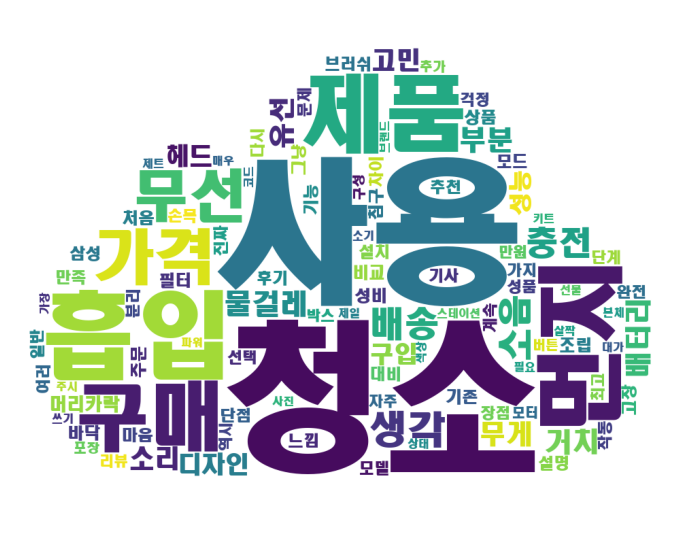

In [221]:
plt.figure(figsize = (15, 10))
plt.imshow(wc) 
plt.axis('off') 
plt.show()

## 정새하

In [222]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [223]:
cleaner_stopwords = ['삼성', '제품', '머리카락', '리뷰', '숙소', '여행', '트립','청소기','청소']
for word in cleaner_stopwords:
    stopwords.append(word)

In [224]:
all_cleaner_review_list = dyson_review_list + dibea_review_list+lg_review_list+tefal_review_list+samsung_review_list+sinil_review_list+cucu_review_list+boman_review_list+vivre_review_list+oa_review_list

In [225]:
#CountVectorizer
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(text)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(all_cleaner_review_list) #각 단어가 리뷰별 등장 횟수(2차원 배열)
word_list = vect.get_feature_names() # 단어 리스트
count_list = bow_vect.toarray().sum(axis=0) # 단어 빈도수



C:\Users\w0w12\.conda\envs\py3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [226]:
#단어 + 카운트
word_count_dict = dict(zip(word_list, count_list))

In [227]:
# vocab = sorted(word_count_dict, key=word_count_dict.get, reverse=True) # 단어 빈도를 기준으로 내림차숨으로 정렬
# vocab

In [228]:
#TF-IDF로 변환
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import linear_kernel

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)
# tf_idf_vect = tfidf_vectorizer.fit_transform(all_cleaner_review_list)
# cosine_sim = linear_kernel(tf_idf_vect, tf_idf_vect)

print(tf_idf_vect.toarray())
print(tf_idf_vect.toarray().shape)
#word_count_dict = dict(zip(word_list, tf_idf_vect))
#print(tf_idf_vect)


[[0.         0.07899822 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(1000, 3771)


In [229]:
#벡터를 단어로 맵핑
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
# invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
# print(str(invert_index_vectorizer)[:100]+'...')

In [230]:
# TF-IDF 값이 가장 높은 단어 출력
np.argsort(tf_idf_vect[0].toarray())[0][-3:] #0번째 카테고리 중 가장 높은 tf-idf 값의 행들이 index로 출력
np.argsort(tf_idf_vect.toarray())[:, -3:] #모든 카테고리 들의 가장 중요한 단어 3개씩 출력(각 리뷰에서 가장 중요한 단어 3개씩 출력)

array([[3417,  798, 1701],
       [1107,  455,  632],
       [3473, 1808,  939],
       ...,
       [3009, 3114, 2718],
       [2923, 3708,  255],
       [1974, 1230, 1053]], dtype=int64)

In [231]:
top_3_word = np.argsort(tf_idf_vect.toarray())[:, -3:]
top_3_impo = []

#중요도 출력
for i, wordindex in enumerate(top_3_word):
    num_li = []
    for j in wordindex:       
        point = round(tf_idf_vect[i].toarray()[:,j:j+1][0][0],4)
        num_li.append(point)
    top_3_impo.append(num_li)
        
  
df = pd.DataFrame()
df['important_word_indexes']=pd.Series(top_3_word.tolist()) #가장 높은 vector 3개를 칼럼에 추가 가능
df['important_word_importance']=pd.Series(top_3_impo)
df

,important_word_indexes,important_word_importance
0,"[3417, 798, 1701]","[0.2251, 0.2506, 0.3477]"
1,"[1107, 455, 632]","[0.2342, 0.3401, 0.3716]"
2,"[3473, 1808, 939]","[0.258, 0.273, 0.2862]"
3,"[1801, 383, 608]","[0.2263, 0.2393, 0.349]"
4,"[2713, 3687, 608]","[0.2221, 0.2787, 0.2868]"
...,...,...
995,"[2541, 2100, 370]","[0.2617, 0.2695, 0.4509]"
996,"[2390, 1359, 3402]","[0.2497, 0.2607, 0.4566]"
997,"[3009, 3114, 2718]","[0.3088, 0.3088, 0.3634]"
998,"[2923, 3708, 255]","[0.2688, 0.2983, 0.3656]"


In [232]:
# #원하는 인덱스 하나만 뽑고싶은데 ㅠㅠ 2차원에서
# top_3_word = np.argsort(tf_idf_vect.toarray())
# tf_idf_vect[0].toarray()[:,3417:3418]

In [233]:
# vector 에 따른 단어 3개씩 불러와서 출력
def convert_to_word(x):
	word_list =[]
	for word in x:
		word_list.append(invert_index_vectorizer[word])
	return word_list
    
df['important_words']=df['important_word_indexes'].apply(lambda x : convert_to_word(x))
df.head()

,important_word_indexes,important_word_importance,important_words
0,"[3417, 798, 1701]","[0.2251, 0.2506, 0.3477]","[파이프, 동성, 선반]"
1,"[1107, 455, 632]","[0.2342, 0.3401, 0.3716]","[모양, 길이, 단점]"
2,"[3473, 1808, 939]","[0.258, 0.273, 0.2862]","[포장, 손잡이, 롤링]"
3,"[1801, 383, 608]","[0.2263, 0.2393, 0.349]","[손목, 글라이드, 다이슨]"
4,"[2713, 3687, 608]","[0.2221, 0.2787, 0.2868]","[자주, 혼자, 다이슨]"


In [234]:
##내가 원하는건 이건데 ㅠ 

In [235]:
word_count_test = pd.DataFrame({
    '단어': word_list,
    '빈도': tf_idf_vect.sum(axis=0).flat
})

In [236]:
word_count_test

,단어,빈도
0,가게,0.817596
1,가격,37.563972
2,가구,2.972761
3,가기,0.675851
4,가까이,0.665389
...,...,...
3766,흥건,0.167363
3767,희망사항,0.351609
3768,흰색,2.125115
3769,힘껏,0.685832


In [237]:
#value 값으로 정렬
df_sorted_by_values = word_count_test.sort_values(by='빈도' ,ascending=False)
df_sorted_by_values.iloc[:20]

,단어,빈도
1588,사용,62.364272
3765,흡입,49.891892
1056,먼지,42.002885
1,가격,37.563972
314,구매,37.331979
1308,배송,32.281591
1670,생각,30.970608
1147,무선,30.010101
1174,물걸레,28.815689
3238,충전,26.520421


In [238]:
#TF-IDF score Top 100 단어 시각화
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
data_array_tf = tf_idf_vect.toarray()
data_array_tf.shape
data_visualize_df = pd.DataFrame(data_array_tf, columns=word_list)
data_visualize_df.shape

(1000, 3771)

In [239]:
data_array_tf.T.shape

(3771, 1000)

In [240]:
Z = tsne.fit_transform(data_array_tf.T)

C:\Users\w0w12\.conda\envs\py3.8\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\w0w12\.conda\envs\py3.8\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3771 samples in 0.011s...
[t-SNE] Computed neighbors for 3771 samples in 1.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3771
[t-SNE] Computed conditional probabilities for sample 2000 / 3771
[t-SNE] Computed conditional probabilities for sample 3000 / 3771
[t-SNE] Computed conditional probabilities for sample 3771 / 3771
[t-SNE] Mean sigma: 0.089380
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.428093
[t-SNE] KL divergence after 10000 iterations: 1.010862


C:\Users\w0w12\AppData\Local\Temp/ipykernel_27136/3623125882.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\w0w12\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


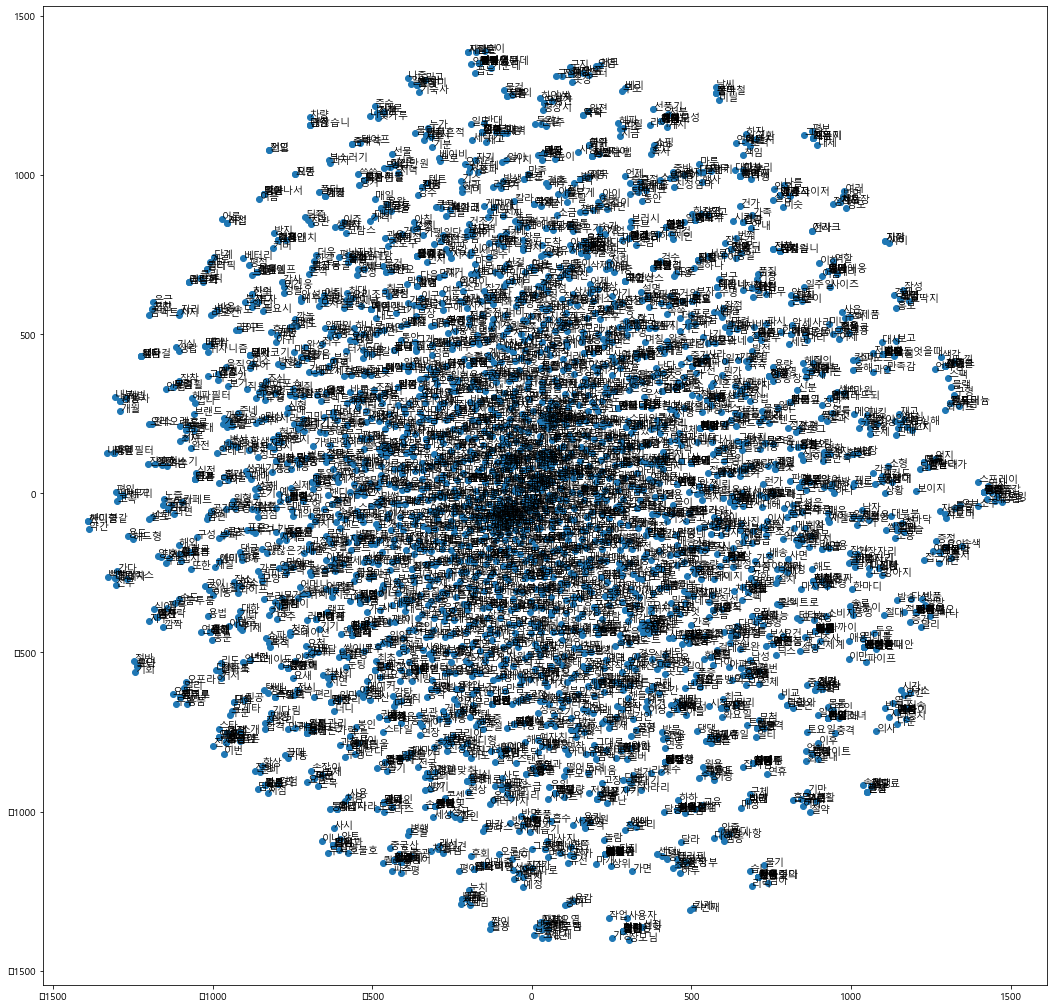

In [241]:
from matplotlib import font_manager,rc 
import matplotlib.pyplot as plt
font_path = r"c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)


plt.figure(figsize = (18,18))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(word_list)):
    # plt.annotate(s=word_list[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]), xytext=(50,20), fontsize=10, ha='center',fontProperties =fontprop)
    word = str(word_list[i].encode("utf8").decode("utf8"))
    plt.annotate(word,xy=(Z[i,0], Z[i,1]))
plt.draw()

## 정한슬

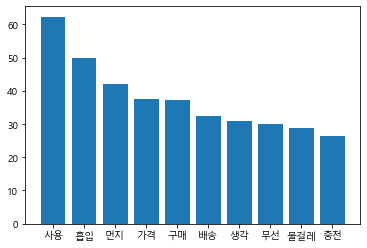

In [244]:
#df_sorted_by_values
import matplotlib.pyplot as plt
#상위 10개 단어 막대그래프
x=df_sorted_by_values['단어'][:10]
y=df_sorted_by_values['빈도'][:10]
#워드클라우드와 같이 막대그래프로
#단어의 빈도수를 보면 사용감이 좋은지, 흡입력이 좋은지, 먼지를 잘 빨아들이는지, 가격이 괜찮은지, 배송이 빠른지 느린지, 생각보다 괜찮은지 생각보다 별로인지,
#무선이라 편한지, 물걸레로도 쓸수있는 청소기인지, 충전력이 좋은지를 사람들이 많이 고려한다는 것을 알 수 있습니다.
plt.bar(x,y)
plt.show()

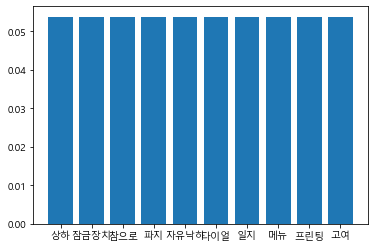

In [ ]:
#df_sorted_by_values
import matplotlib.pyplot as plt
#하위 10개, 그 위의 10개도 해봤는데 이 막대그래프는 쓸모없는 것 같아용
x=df_sorted_by_values['단어'][-20:-10]
y=df_sorted_by_values['빈도'][-20:-10] 

plt.bar(x,y)
plt.show()

In [249]:
rank = sorted(score_list, key = lambda x :-x[1])

print(type(rank))

<class 'list'>


In [250]:
x = []
y = []
for name,i in rank:
    x.append(name)
    y.append(i)


In [251]:
df=pd.DataFrame((zip(x, y)), columns = ['Name', 'Score'])
df

,Name,Score
0,LG전자 A9S 오브제컬렉션 AO9471WKT,79.00
1,다이슨 옴니 글라이드 컴플리트 플러스,76.00
2,삼성전자 삼성 VC-H71,74.05
3,다이슨 V10 카본파이버,73.90
4,보만 코맘스 KB0251,72.05
5,2020년형테팔 엑스퍼트3.60 TY6933,72.00
6,테팔 TY6545KL,71.60
7,삼성전자 제트 VS20T9218QDCC,71.40
8,쿠쿠홈시스 쿠쿠 CVC-A1420UG,70.95
9,2020년형테팔 TY5510,70.55


In [252]:
df1 = df.sort_values('Name')
df1

,Name,Score
23,2020년형오아 클린스틱 OA-CL010,60.75
9,2020년형테팔 TY5510,70.55
5,2020년형테팔 엑스퍼트3.60 TY6933,72.00
14,2021년형디베아 차이슨 ALLNEW29000,67.15
34,2022년형디베아 차이슨 ALLNEW22000,52.50
0,LG전자 A9S 오브제컬렉션 AO9471WKT,79.00
29,LG전자 오브제컬렉션 AO9571,55.90
19,LG전자 코드제로 A9100S,65.00
15,LG전자 코드제로 A9S A9370,66.25
17,LG전자 코드제로 A9S A9700,66.15


In [274]:
len(df1)

40

In [253]:
df2=df[:5]
df2

,Name,Score
0,LG전자 A9S 오브제컬렉션 AO9471WKT,79.00
1,다이슨 옴니 글라이드 컴플리트 플러스,76.00
2,삼성전자 삼성 VC-H71,74.05
3,다이슨 V10 카본파이버,73.90
4,보만 코맘스 KB0251,72.05


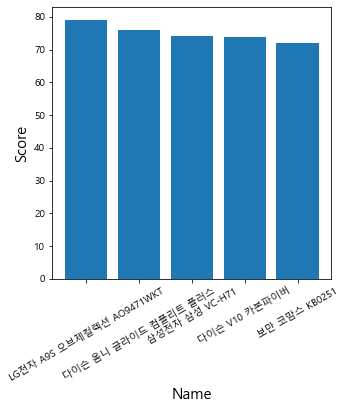

In [312]:
x= df2['Name']
y= df2['Score']

#총 브랜드, 제품들 중에 상위권 5개의 제품과 그 점수 시각화
plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =30)
plt.show()

제조사 별로 상위권 점수보기 

In [293]:
df_lg=df1[5:11]
df_lg=df_lg.sort_values(by='Score' ,ascending=False)
df_lg

,Name,Score
0,LG전자 A9S 오브제컬렉션 AO9471WKT,79.00
15,LG전자 코드제로 A9S A9370,66.25
17,LG전자 코드제로 A9S A9700,66.15
19,LG전자 코드제로 A9100S,65.00
29,LG전자 오브제컬렉션 AO9571,55.90
30,LG전자 코드제로 A9S 올인원타워 AS9370IKT,55.00


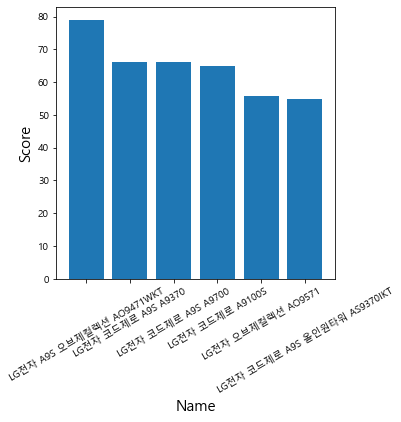

In [311]:
x = df_lg['Name']
y = df_lg['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =30)
plt.show()

In [292]:
df_dison=df1[11:16]
df_dison=df_dison.sort_values(by='Score' ,ascending=False)
df_dison

,Name,Score
1,다이슨 옴니 글라이드 컴플리트 플러스,76.00
3,다이슨 V10 카본파이버,73.90
35,다이슨 V7 플러피,51.70
36,다이슨 V11 220 에어와트 CF+,51.45
38,다이슨 V15 디텍트 컴플리트,48.40


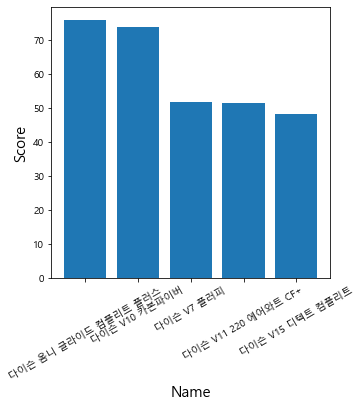

In [309]:
x = df_dison['Name']
y = df_dison['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =30)
plt.show()

In [291]:
df_cucu=df1[36:38]
df_cucu=df_cucu.sort_values(by='Score' ,ascending=False)
df_cucu

,Name,Score
8,쿠쿠홈시스 쿠쿠 CVC-A1420UG,70.95
39,쿠쿠홈시스 쿠쿠 CVC-A1410UG,44.75


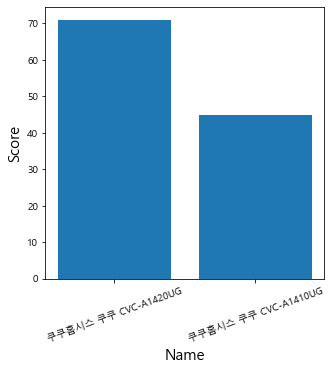

In [304]:
x = df_cucu['Name']
y = df_cucu['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =20)
plt.show()

In [290]:
df_sinil=df1[31:36]
df_sinil=df_sinil.sort_values(by='Score' ,ascending=False)
df_sinil

,Name,Score
16,신일 싹쓸이 SVC-680G,66.20
22,신일전자 SVC-1316R,61.30
24,신일전자 SVC-P5000HP,60.15
32,신일전자 SVC-8858PNX,54.15
33,신일전자 SVC-SHS500,52.65


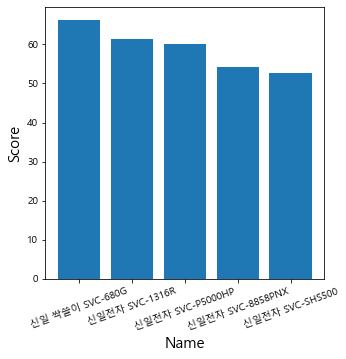

In [314]:
x=df_sinil['Name']
y=df_sinil['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =20)
plt.show()

In [287]:
df_samsung=df1[26:31]
df_samsung=df_samsung.sort_values(by='Score' ,ascending=False)
df_samsung

,Name,Score
2,삼성전자 삼성 VC-H71,74.05
7,삼성전자 제트 VS20T9218QDCC,71.40
12,삼성전자 삼성 VC-H22,68.20
26,삼성전자 제트 VS15R8500BF,59.80
27,삼성전자 비스포크제트 VS20A956A3,59.60


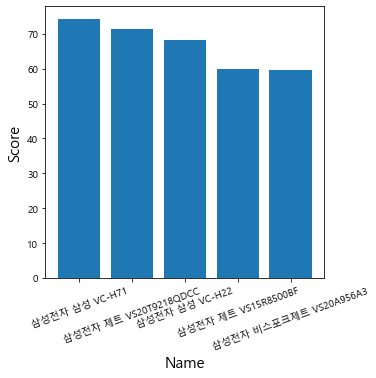

In [316]:
x = df_samsung['Name']
y = df_samsung['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =20)
plt.show()

In [280]:
df_vivre=df1[23:26]
df_vivre

,Name,Score
18,비브르 A9 PLUS,66.10
20,비브르 스톰파워 VE12,63.40
37,비브르 스톰파워 VE30,50.75


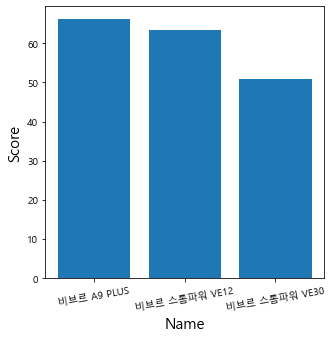

In [320]:
x = df_vivre['Name']
y = df_vivre['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =10)
plt.show()

In [285]:
df_boman=df1[19:23]
df_boman= df_boman.sort_values(by='Score' ,ascending=False)
df_boman

,Name,Score
4,보만 코맘스 KB0251,72.05
11,보만 VC7211,68.60
13,보만 VC7212,67.90
28,보만 VC7210,58.70


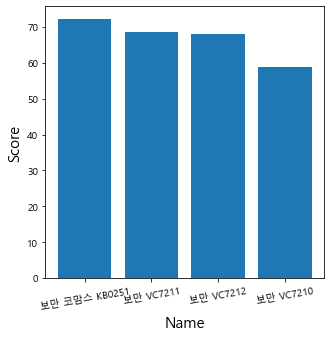

In [321]:
x = df_boman['Name']
y = df_boman['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =10)
plt.show()

In [298]:
df_tefal= df1.loc[[5,6,9,21]]
df_tefal

,Name,Score
5,2020년형테팔 엑스퍼트3.60 TY6933,72.00
6,테팔 TY6545KL,71.60
9,2020년형테팔 TY5510,70.55
21,테팔 TY6543KL,61.35


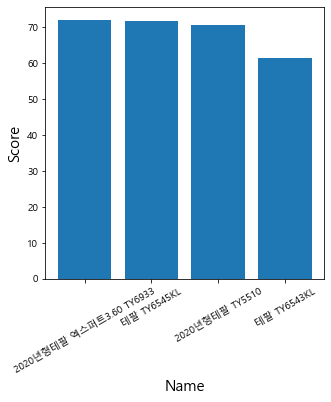

In [326]:
x = df_tefal['Name']
y = df_tefal['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =30)
plt.show()

In [299]:
df_dibea= df1.loc[[10,14,25,31,34]]
df_dibea

,Name,Score
10,디베아 X20,68.75
14,2021년형디베아 차이슨 ALLNEW29000,67.15
25,디베아 M500 퀀텀,59.85
31,디베아 New X10 플러스,54.90
34,2022년형디베아 차이슨 ALLNEW22000,52.50


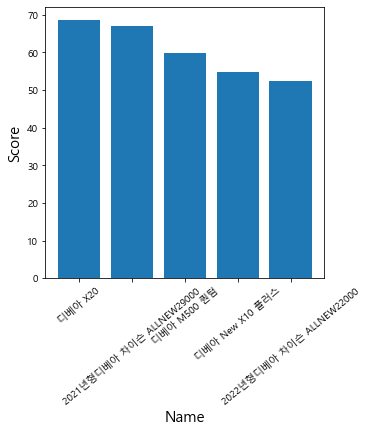

In [330]:
x = df_dibea['Name']
y = df_dibea['Score']

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xlabel('Name',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize= 10, rotation =40)
plt.show()